# Top Airline Flights Between 2019 and 2020

In [1]:
# Import Dependencies and Setup
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
# Add CSV files
# File to Load (Remember to Change These)
airline_flights_2019_to_load = "../Resources/OnewayT_SCHEDULE_T32019.csv"
airline_flights_2020_to_load = "../Resources/OnewayT_SCHEDULE_T32020.csv"

# Read School and Student Data File and store into Pandas DataFrames
airline_flights_2019 = pd.read_csv(airline_flights_2019_to_load)
airline_flights_2020 = pd.read_csv(airline_flights_2020_to_load)

In [3]:
# Look at the data for Airline Flights 2019
airline_flights_2019.head()

,UNIQUE_CARRIER,Description,Sum(REV_ACRFT_DEP_PERF_510)
0,04Q,Tradewind Aviation,7366
1,09Q,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",2825
2,0WQ,Avjet Corporation,308
3,1AQ,Via Airlines d/b/a Charter Air Transport,568
4,1BQ,"Eastern Airlines f/k/a Dynamic Airways, LLC",194


In [4]:
# Change the name of the columnn to say 2019 Total Number of Flights from the Airline Flights 2019 DataFrame.
airline_flights_19 = airline_flights_2019.rename(columns={"Description": "Airline Company", "Sum(REV_ACRFT_DEP_PERF_510)": "2019 Total Number of Flights"})
airline_flights_19.head()

,UNIQUE_CARRIER,Airline Company,2019 Total Number of Flights
0,04Q,Tradewind Aviation,7366
1,09Q,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",2825
2,0WQ,Avjet Corporation,308
3,1AQ,Via Airlines d/b/a Charter Air Transport,568
4,1BQ,"Eastern Airlines f/k/a Dynamic Airways, LLC",194


In [5]:
# Look at the data for Airline Flights 2020
airline_flights_2020.head()

,UNIQUE_CARRIER,Description,Sum(REV_ACRFT_DEP_PERF_510)
0,04Q,Tradewind Aviation,4502
1,09Q,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",7334
2,1EQ,"KaiserAir, Inc.",158
3,1QQ,City Wings Inc dba Seaflight,864
4,1SQ,Star Marianas Air Inc.,12356


In [6]:
# Change the name of the columnn to say 2020 Total Number of Flights from the US Airline Flights 2020 DataFrame.
airline_flights_20 = airline_flights_2020.rename(columns={"Description": "Airline Company", "Sum(REV_ACRFT_DEP_PERF_510)": "2020 Total Number of Flights"})
airline_flights_20.head()

,UNIQUE_CARRIER,Airline Company,2020 Total Number of Flights
0,04Q,Tradewind Aviation,4502
1,09Q,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",7334
2,1EQ,"KaiserAir, Inc.",158
3,1QQ,City Wings Inc dba Seaflight,864
4,1SQ,Star Marianas Air Inc.,12356


In [7]:
# Combine the data into a single dataset so we can have 2019 and 2020 flight on one DataFrame.  
airline_flights_19_20 = pd.merge(airline_flights_19, airline_flights_20, how="left", on=["UNIQUE_CARRIER", "UNIQUE_CARRIER"])
airline_flights_19_20

,UNIQUE_CARRIER,Airline Company_x,2019 Total Number of Flights,Airline Company_y,2020 Total Number of Flights
0,04Q,Tradewind Aviation,7366,Tradewind Aviation,4502.0
1,09Q,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",2825,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",7334.0
2,0WQ,Avjet Corporation,308,NaN,NaN
3,1AQ,Via Airlines d/b/a Charter Air Transport,568,NaN,NaN
4,1BQ,"Eastern Airlines f/k/a Dynamic Airways, LLC",194,NaN,NaN
...,...,...,...,...,...
115,YV,Mesa Airlines Inc.,234892,Mesa Airlines Inc.,98907.0
116,YX,Republic Airline,329141,Republic Airline,154768.0
117,Z3,"Bidzy Ta Hot Aana, Inc. d/b/a Tanana Air Service",4062,"Bidzy Ta Hot Aana, Inc. d/b/a Tanana Air Service",2263.0
118,Z3Q,"PM Air, LLC",3574,"PM Air, LLC",2244.0


In [8]:
# Drop the columns we don't need.
clean_airline_flights_19_20 = airline_flights_19_20.drop(['Airline Company_y', 'UNIQUE_CARRIER'], axis=1)
clean_airline_flights_19_20

,Airline Company_x,2019 Total Number of Flights,2020 Total Number of Flights
0,Tradewind Aviation,7366,4502.0
1,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",2825,7334.0
2,Avjet Corporation,308,NaN
3,Via Airlines d/b/a Charter Air Transport,568,NaN
4,"Eastern Airlines f/k/a Dynamic Airways, LLC",194,NaN
...,...,...,...
115,Mesa Airlines Inc.,234892,98907.0
116,Republic Airline,329141,154768.0
117,"Bidzy Ta Hot Aana, Inc. d/b/a Tanana Air Service",4062,2263.0
118,"PM Air, LLC",3574,2244.0


In [9]:
# Fill in columns that have Nan to 0 to indicate 0 flights took place.
caf_19_20 = clean_airline_flights_19_20.fillna(0)
caf_19_20

,Airline Company_x,2019 Total Number of Flights,2020 Total Number of Flights
0,Tradewind Aviation,7366,4502.0
1,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",2825,7334.0
2,Avjet Corporation,308,0.0
3,Via Airlines d/b/a Charter Air Transport,568,0.0
4,"Eastern Airlines f/k/a Dynamic Airways, LLC",194,0.0
...,...,...,...
115,Mesa Airlines Inc.,234892,98907.0
116,Republic Airline,329141,154768.0
117,"Bidzy Ta Hot Aana, Inc. d/b/a Tanana Air Service",4062,2263.0
118,"PM Air, LLC",3574,2244.0


In [10]:
# Change the column name to reflect US Airline Companies. This will show the names of the Airlines that flew over 2019 and 2020.
cafs_19_20 = caf_19_20.rename(columns={"Airline Company_x": "Airline Companies"})
cafs_19_20

,Airline Companies,2019 Total Number of Flights,2020 Total Number of Flights
0,Tradewind Aviation,7366,4502.0
1,"Swift Air, LLC d/b/a Eastern Air Lines d/b/a E...",2825,7334.0
2,Avjet Corporation,308,0.0
3,Via Airlines d/b/a Charter Air Transport,568,0.0
4,"Eastern Airlines f/k/a Dynamic Airways, LLC",194,0.0
...,...,...,...
115,Mesa Airlines Inc.,234892,98907.0
116,Republic Airline,329141,154768.0
117,"Bidzy Ta Hot Aana, Inc. d/b/a Tanana Air Service",4062,2263.0
118,"PM Air, LLC",3574,2244.0


In [11]:
# Find the sum of the total number of US flights taken in 2019.
total_number_of_flights_2019 = cafs_19_20['2019 Total Number of Flights'].sum()
print(f"The total number of flights taken in 2019 is {total_number_of_flights_2019}.")

The total number of flights taken in 2019 is 9771281.


In [12]:
# Find the sum of the total number of US flights taken in 2020.
total_number_of_flights_2020 = cafs_19_20['2020 Total Number of Flights'].sum()
print(f"The total number of flights taken in 2019 is {total_number_of_flights_2020}.")

The total number of flights taken in 2019 is 4577349.0.


In [13]:
# Find the percentage change of the total number of flights taked from 2019 and 2020.
percentage_change_19_20 = ((total_number_of_flights_2020 - total_number_of_flights_2019)/total_number_of_flights_2019)*100
print(f"The change in the number of flights from top airlines from 2019 to 2020 is {percentage_change_19_20.round()}%.")

The change in the number of flights from top airlines from 2019 to 2020 is -53.0%.


In [14]:
# Set the Airline Companies column as the DataFrame's index.
CAF_19_20 = cafs_19_20.set_index('Airline Companies')
CAF_19_20

,2019 Total Number of Flights,2020 Total Number of Flights
Airline Companies,,
Tradewind Aviation,7366,4502.0
"Swift Air, LLC d/b/a Eastern Air Lines d/b/a Eastern",2825,7334.0
Avjet Corporation,308,0.0
Via Airlines d/b/a Charter Air Transport,568,0.0
"Eastern Airlines f/k/a Dynamic Airways, LLC",194,0.0
...,...,...
Mesa Airlines Inc.,234892,98907.0
Republic Airline,329141,154768.0
"Bidzy Ta Hot Aana, Inc. d/b/a Tanana Air Service",4062,2263.0


In [15]:
# Sort the US Airline 2019-2020 Flights in order from the most amount of flights taken to the least.
tops_airline_flights_19_20 = CAF_19_20.sort_values(by='2019 Total Number of Flights', ascending=False)
tops_airline_flights_19_20.head()

,2019 Total Number of Flights,2020 Total Number of Flights
Airline Companies,,
Southwest Airlines Co.,1350617,692489.0
Delta Air Lines Inc.,1073931,433691.0
American Airlines Inc.,1022440,448130.0
SkyWest Airlines Inc.,839886,426439.0
United Air Lines Inc.,710030,241552.0


In [16]:
# Display only airlines that had over 130,000 flights from 2019.
top_airline_flights_19_20 = tops_airline_flights_19_20.loc[(tops_airline_flights_19_20['2019 Total Number of Flights']>130000)]
top_airline_flights_19_20

,2019 Total Number of Flights,2020 Total Number of Flights
Airline Companies,,
Southwest Airlines Co.,1350617,692489.0
Delta Air Lines Inc.,1073931,433691.0
American Airlines Inc.,1022440,448130.0
SkyWest Airlines Inc.,839886,426439.0
United Air Lines Inc.,710030,241552.0
JetBlue Airways,331972,117179.0
Envoy Air,329349,155885.0
Republic Airline,329141,154768.0
PSA Airlines Inc.,285588,137886.0


In [17]:
# Find the percentage change in flights between the years 2019 and 2020.
percentage_change = ((top_airline_flights_19_20['2020 Total Number of Flights']-top_airline_flights_19_20['2019 Total Number of Flights'])/top_airline_flights_19_20['2019 Total Number of Flights']*100)
percentage_change

Airline Companies
Southwest Airlines Co.        -48.727952
Delta Air Lines Inc.          -59.616493
American Airlines Inc.        -56.170533
SkyWest Airlines Inc.         -49.226562
United Air Lines Inc.         -65.980029
JetBlue Airways               -64.702144
Envoy Air                     -52.668750
Republic Airline              -52.978207
PSA Airlines Inc.             -51.718560
Federal Express Corporation   -26.358418
Alaska Airlines Inc.          -60.300213
Endeavor Air Inc.             -45.713471
Mesa Airlines Inc.            -57.892563
Spirit Air Lines              -52.436122
United Parcel Service         -16.896413
ExpressJet Airlines LLC       -63.489174
Frontier Airlines Inc.        -52.418133
dtype: float64

## Creating bar graphs to compare US flight data between 2019 and 2020.

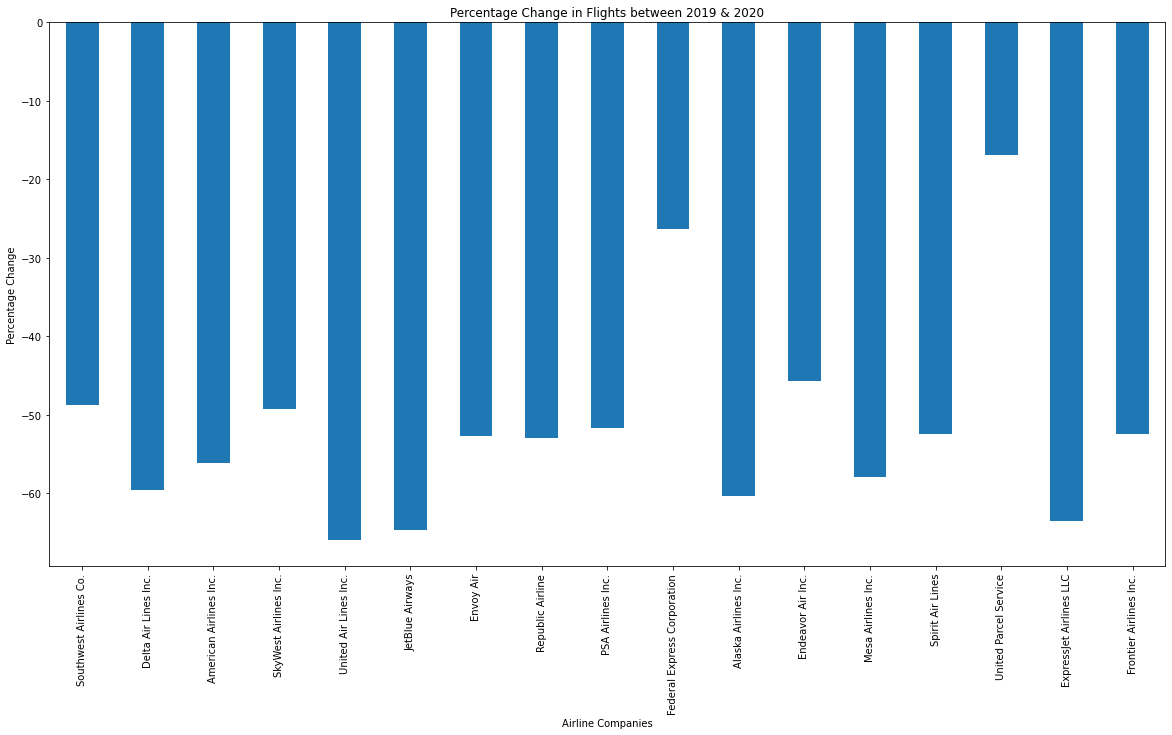

In [18]:
# Create a bar graph to show the percentage change in flights.
pc = percentage_change.plot.bar(rot=90, figsize=(20,10))

pc.set_ylabel("Percentage Change")
pc.set_title('Percentage Change in Flights between 2019 & 2020')

plt.savefig('..output_data/Percentage_Change_in_Flights_between_2019_and_2020.png')
plt.show()

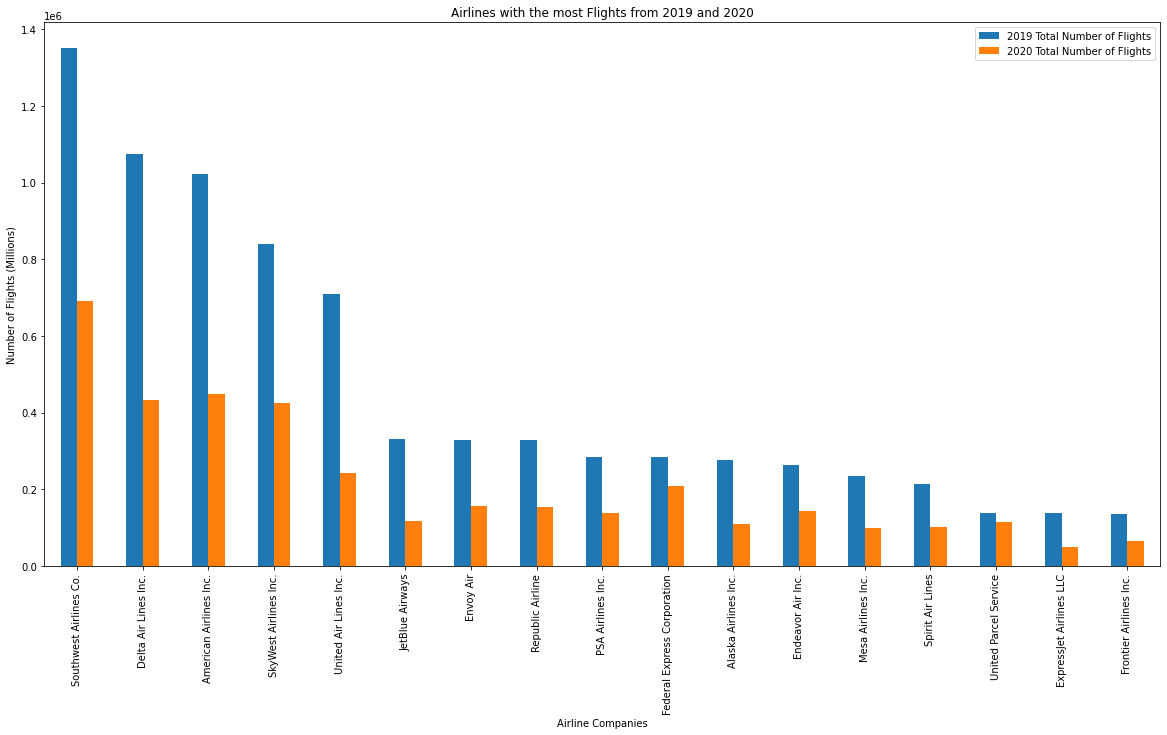

In [19]:
# Create a bar graph that shows the the number of flights taken from the top US Airline Companies in 2019 and 2020.
taf = top_airline_flights_19_20.plot.bar(rot=90, figsize=(20,10))
taf.set_ylabel("Number of Flights (Millions)")
taf.set_title('Airlines with the most Flights from 2019 and 2020')
plt.savefig('../output_data/Top_Airline_Flights_19_20.png')
plt.show()